**The Gaussian Copula**

The Gaussian Copula is a tool which is widely used in both Quantitative Finance and Actuarial applications. It is useful for modelling the dependencies of different risk structures and is particulary useful for capturing tail behaviour. 

The copula allows us to combine seperate univariate distributions into multivariate distributions, like an emulsifier that provides a framework for water and oil to mix, forcing them to interact and examining the resulting multi-variate distribution. The Gaussian copula in particular assumes these distributions follow a multivariate normal distribution. 

*Formation of the Gaussian copula*:

Assume we have 2 standard normal marginal distributions:
$$
Z_1 \sim \mathbb{N}(0,1)\\
Z_2 \sim \mathbb{N}(0,1)
$$

We then transform these variables into normal random variables using the probability integral theorem.\\
$$
u_1=F_1(Z_1)\\
u_2=F_2(Z_2)
$$

Now we can create the Gaussian Copula where
$$
C(u_1,u_2)=\phi_2(\phi^-1(U_1),\phi^-1(U_2)|\rho)
$$
Where:
$\phi^-1$ is the inverse normal CDF and $\phi_2$ is the CDF of the inverse normal multivariate distribution and $\rho$ is the correlation coefficient.

This can be extended to $n$ assets using an $n*n$ covariance matrix


The copula allows us to looks at how different asset/liability classes move in relation to each other. This is essential for analysing markets or pricing insurance contracts as the assumption of independance between risks does not always hold and it is essential to model this behaviour. Spotting these 'pairs' can aid in areas such as:\\
- Identifying arbitrage opporunities by finding moving pairs 
- Developing more comprehensive risk management strategies by looking at joint movement of different asset classes helping to avoid significant losses

In this document I will explore a quantiative and actuarial use respectively:

In [1]:
#import libraries
import numpy as np
import pandas as pd
import yfinance as yf #enables downloading of stock data 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, multivariate_normal

In [23]:
#Downloading data
tickers=['AAPL','MSFT','AMZN','GOOGL','META','TSLA','NVDA','PYPL']
#Choose more recent data as asset classes are not stationary and market moveement patterns change over time
# Take the adjusted close prices
df= yf.download(tickers, start = '2015-01-01', end = '2024-01-01')['Close']
ret = df.pct_change().dropna()
ret.head()

[*********************100%***********************]  8 of 8 completed


Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,PYPL,TSLA
Date,,,,,,,,
2015-07-07,-0.002460,0.001560,0.008083,-0.003769,-0.002027,-0.018840,-0.002452,-0.042328
2015-07-08,-0.024823,-0.016074,-0.015145,-0.018001,-0.001354,-0.007074,-0.052430,-0.048231
2015-07-09,-0.020397,0.010915,0.005446,0.002685,0.006329,-0.012214,-0.005764,0.011610
2015-07-10,0.026735,0.020995,0.021041,0.024104,0.002021,0.017517,0.005507,0.004769
2015-07-13,0.019306,0.027192,0.028088,0.024446,0.020847,0.006582,0.060248,0.011615


Now lets identify the correlation matrix. Here we can identify pairs with low correlations allowing us to form diversified portoflios as well as assets with high correlation in order to see how asset classes have dependence which can create arbitrage opporunities. 

In [52]:
#Covariance matrix
cov_mat=ret.cov()
print(cov_mat)

Ticker      AAPL      AMZN     GOOGL      META      MSFT      NVDA      PYPL  \
Ticker                                                                         
AAPL    0.000342  0.000227  0.000214  0.000247  0.000230  0.000329  0.000247   
AMZN    0.000227  0.000437  0.000250  0.000308  0.000246  0.000346  0.000274   
GOOGL   0.000214  0.000250  0.000332  0.000291  0.000236  0.000316  0.000240   
META    0.000247  0.000308  0.000291  0.000583  0.000253  0.000368  0.000329   
MSFT    0.000230  0.000246  0.000236  0.000253  0.000307  0.000340  0.000253   
NVDA    0.000329  0.000346  0.000316  0.000368  0.000340  0.000954  0.000380   
PYPL    0.000247  0.000274  0.000240  0.000329  0.000253  0.000380  0.000588   
TSLA    0.000293  0.000309  0.000253  0.000300  0.000268  0.000482  0.000356   

Ticker      TSLA  
Ticker            
AAPL    0.000293  
AMZN    0.000309  
GOOGL   0.000253  
META    0.000300  
MSFT    0.000268  
NVDA    0.000482  
PYPL    0.000356  
TSLA    0.001314  


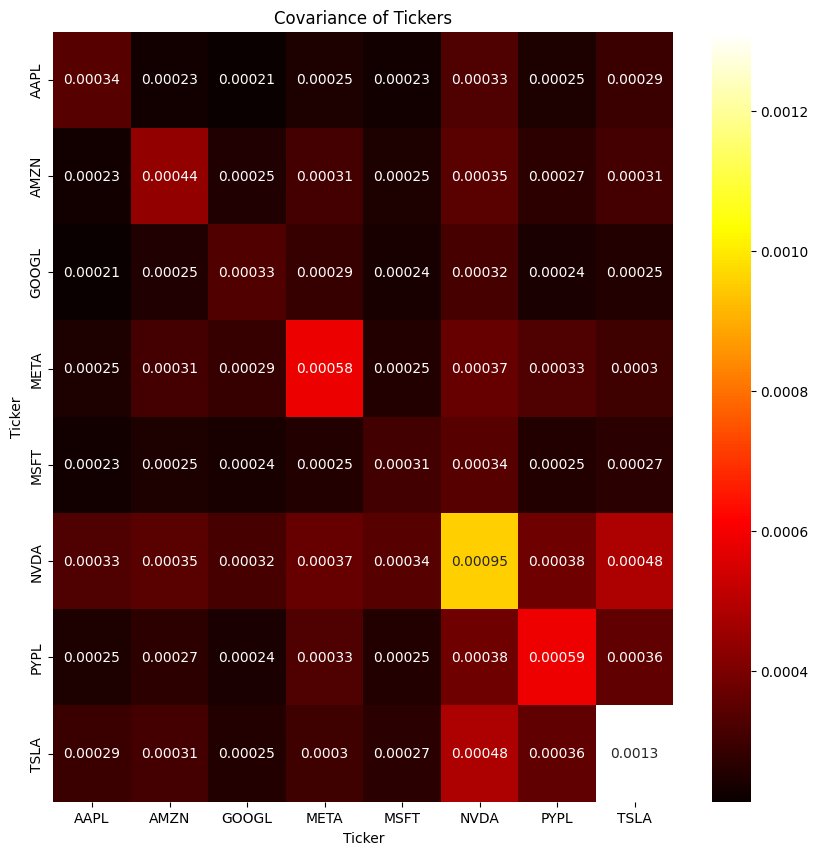

In [53]:
#plot the matrix using a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cov_mat, annot = True, cmap= 'hot')
plt.title('Covariance of Tickers')
plt.show()

In [54]:
#We can find asset pairs good for a diversified portfolio by finding pairs with low covariance such as 
diversifiable_risk = cov_mat.where(cov_mat <0.0003)
diversifiable_risk

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,PYPL,TSLA
Ticker,,,,,,,,
AAPL,NaN,0.000227,0.000214,0.000247,0.000230,NaN,0.000247,0.000293
AMZN,0.000227,NaN,0.000250,NaN,0.000246,NaN,0.000274,NaN
GOOGL,0.000214,0.000250,NaN,0.000291,0.000236,NaN,0.000240,0.000253
META,0.000247,NaN,0.000291,NaN,0.000253,NaN,NaN,NaN
MSFT,0.000230,0.000246,0.000236,0.000253,NaN,NaN,0.000253,0.000268
NVDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PYPL,0.000247,0.000274,0.000240,NaN,0.000253,NaN,NaN,NaN
TSLA,0.000293,NaN,0.000253,NaN,0.000268,NaN,NaN,NaN


However it is important to remember that factors like asset expected return are also important for building a diversified portfolio not simply identifying pairs with low covariance. We can also analyse the probability of joint events which exceed a specified risk tolerence using the gaussian copula. The figure I use for identifying extreme events can be changed to reflect a subjective risk tolerence level e.g. a pension fund which is highly regulated may have a lower risk tolerence then a hedge fund. 

In [68]:
#Lets simulate values from a multivariate normal distribution for our gaussian copula
multinormal = multivariate_normal(mean=np.zeros(len(tickers)), cov = cov_mat)
#Generate our uniform random variables U(0,1) using the Probability Integral Transform
copula_samples = norm.cdf(multinormal.rvs(1000000))

#Now lets identify 'extreme events', in this case extreme negative returns where for all the assets
extreme_events = copula_samples < norm.cdf(-1.5) #We define extreme events as returns below -1.5 standard deviations select large negative tails
#This creates a boolean array of true and false values if the condition is met. 

#Calculate the joint probability of extreme events by taking the means across of exteme events (losses) occuring across all assets allowing us to manage risk against joint losses.
joint_prob = np.mean(np.all(extreme_events, axis = 1))
print(f"Joint probability of extreme losses: {joint_prob}")

Joint probability of extreme losses: 0.0


Now lets look for assets with strong dependencies to identify pair trading opportunities. 

In [70]:
ranked = norm.ppf(ret.rank(pct=True)) 